In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [85]:
data = pd.read_csv('possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


<li>case - Номер наблюдения
<li>site - Номер участка, где был пойман в ловушку опоссум.
<li>pop - Население  Vic(Виктория) или other(Новый Южный Уэльс или Квинсленд).
<li>sex - m (мужской) или f (женский).
<li>age - возраст.
<li>hdlngth - Длина головы, мм.
<li>skullw - Ширина черепа, в мм.
<li>totlngth - Общая длина, в сантиметрах.
<li>taill - Длина хвоста, в сантиметрах.
<li>footlgth - Длина стопы
<li>earconch - Длина ушной раковины
<li>eye - Расстояние от медиального выступа до латерального выступа правого глаза
<li>chest - Обхват груди (в см).
<li>belly - Обхват живота (в см).

In [86]:
print(data['Pop'].unique())
print(data['site'].unique())
print(data['age'].unique())

['Vic' 'other']
[1 2 3 4 5 6 7]
[ 8.  6.  2.  1.  9.  5.  3.  4.  7. nan]


In [87]:
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['footlgth'].fillna(data['footlgth'].mean(), inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
data.shape

(104, 14)

In [88]:
data.drop(columns='case', inplace=True)

C:\Users\Ксения\AppData\Local\Temp\ipykernel_9192\2404873716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


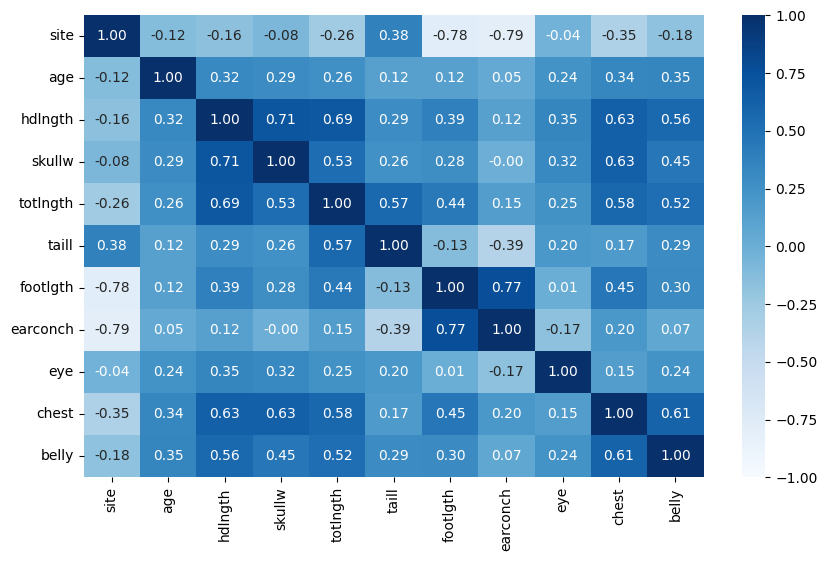

In [8]:
corr = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)
plt.show()

### Earconch наиболее отрицательно (-0,79) коррелирует с местом регистрации опоссума. Footlgth и Earconch положительно коррелируют друг с другом (0,77). Таким образом, между этими двумя признаками существует статистически значимая взаимосвязь.

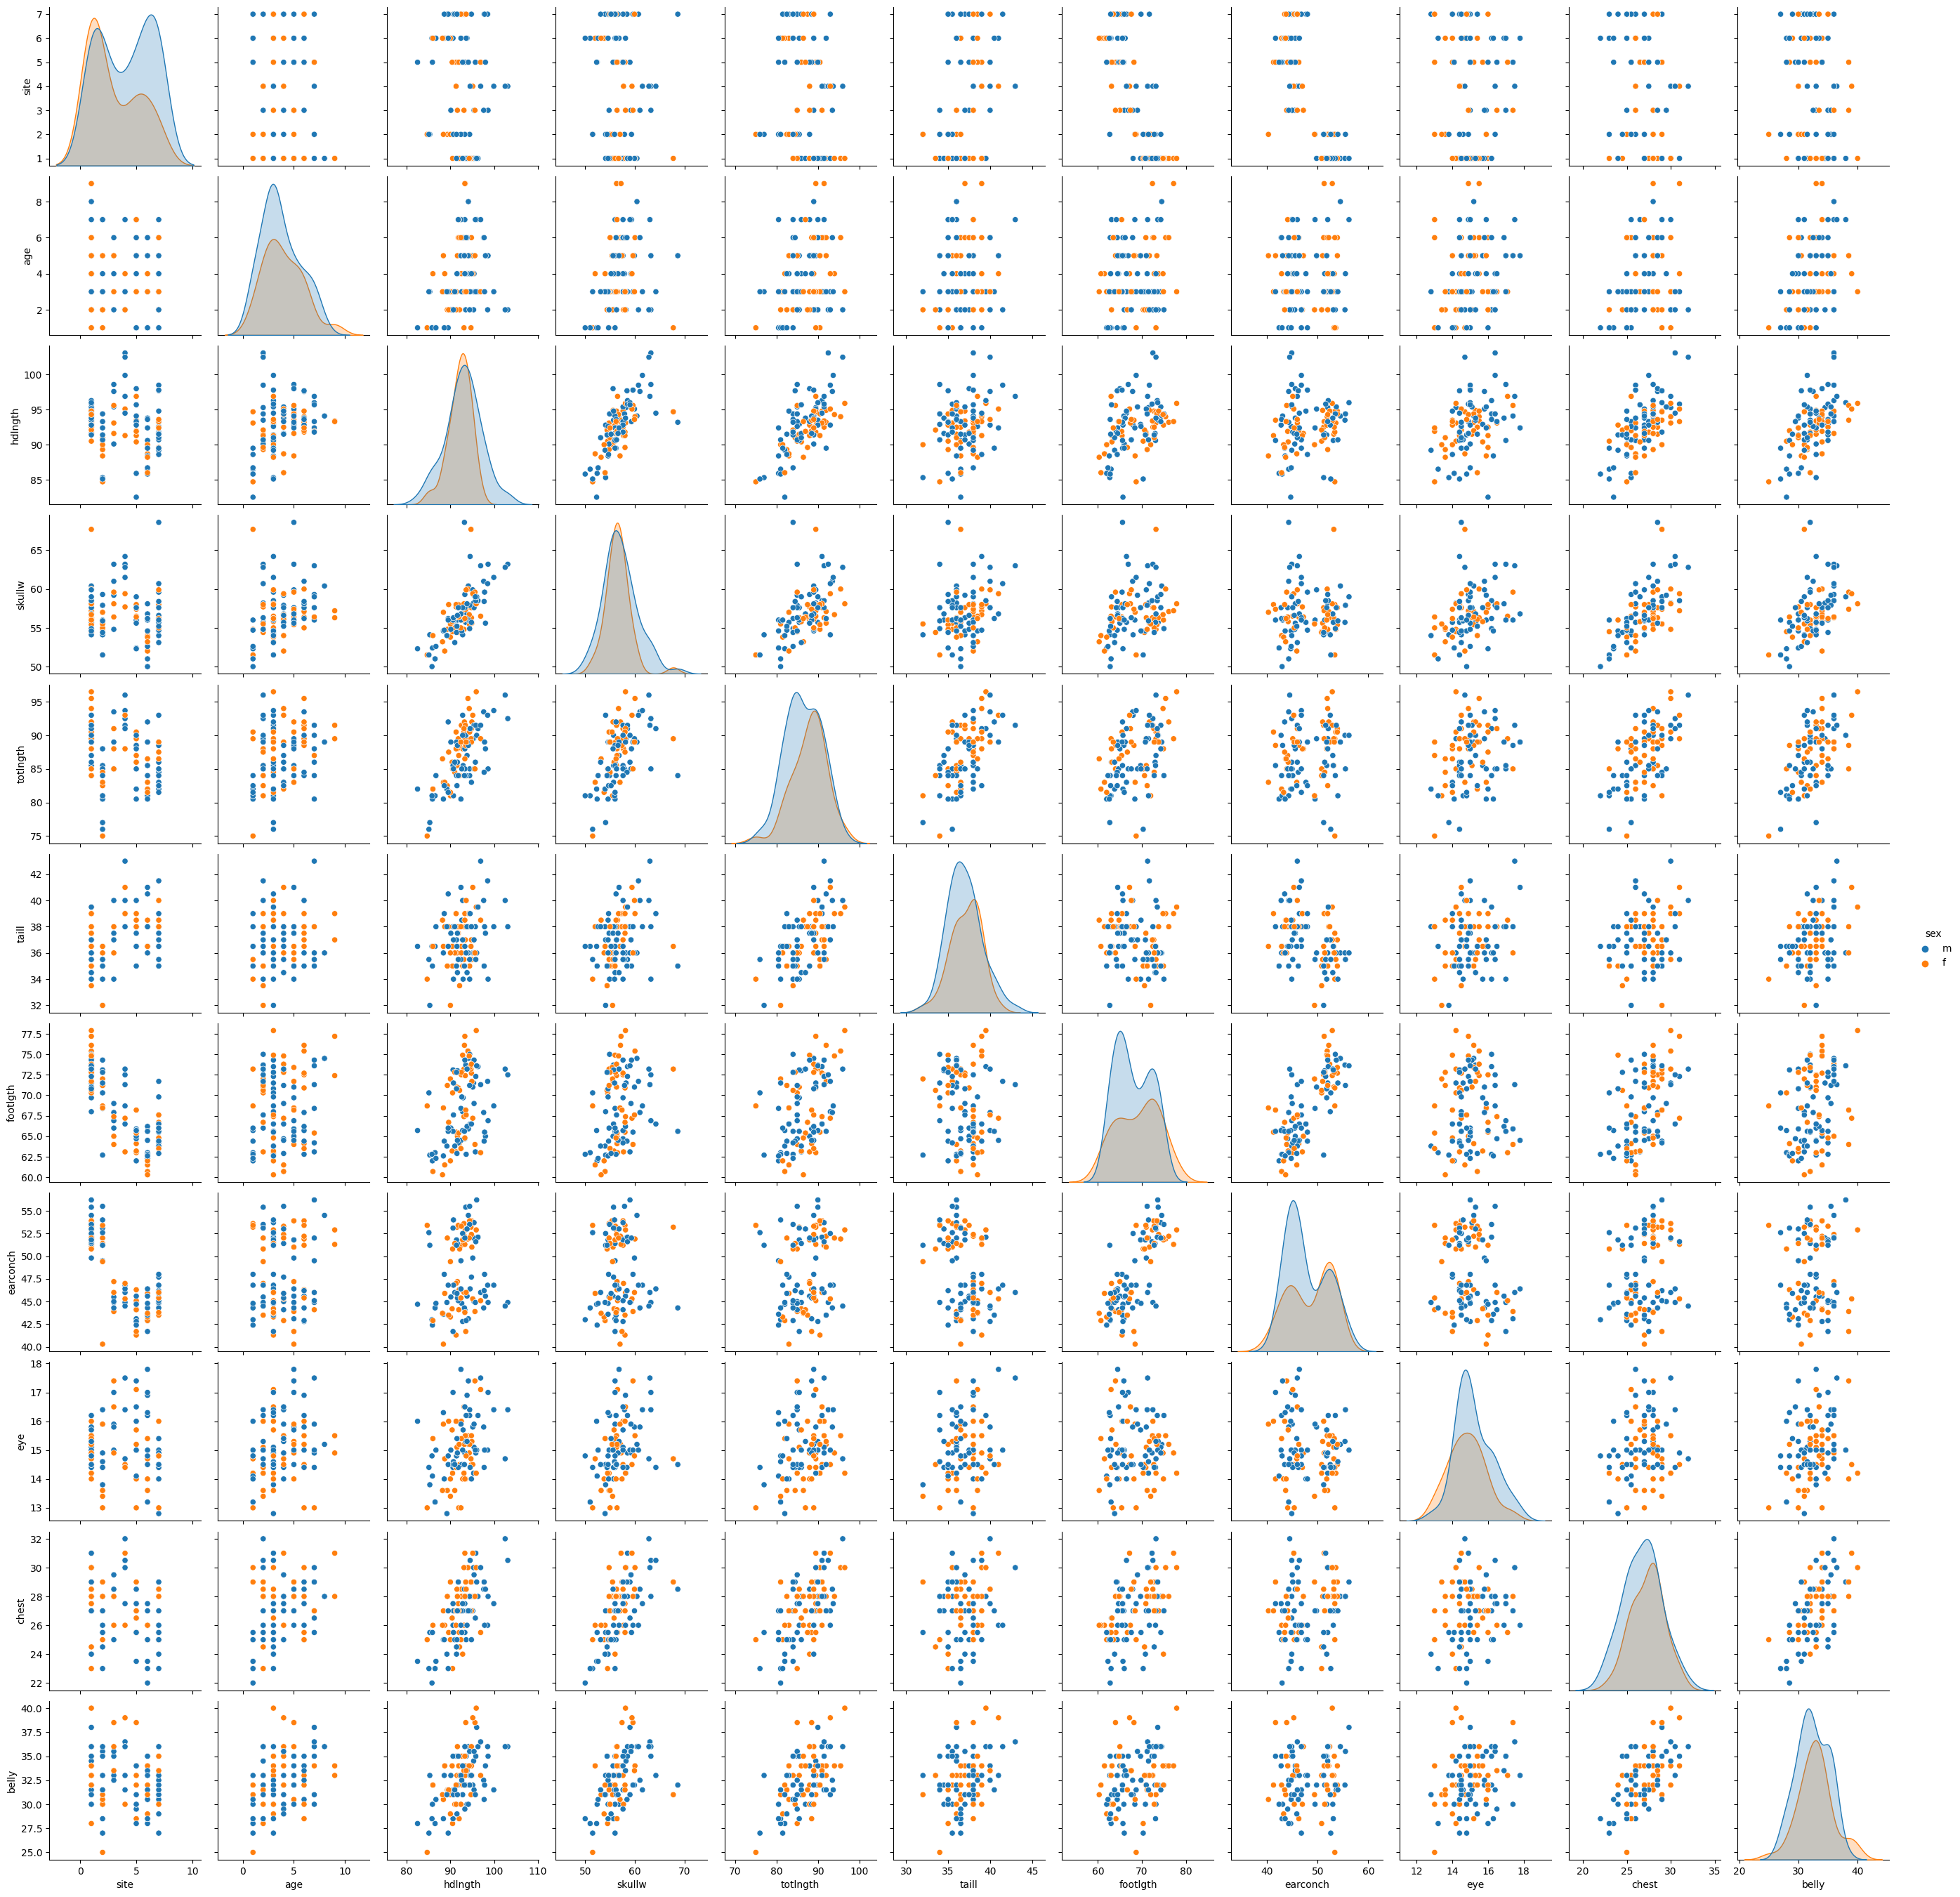

In [9]:
sns.pairplot(data, hue="sex")
plt.show()

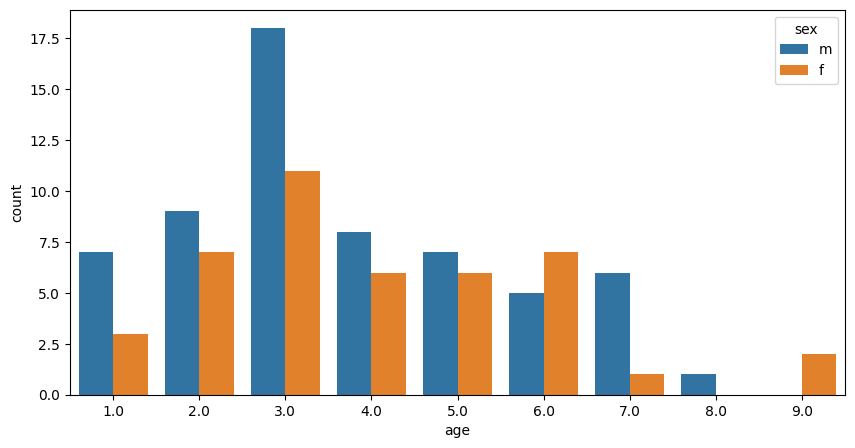

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x ='age', hue= 'sex', data = data)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

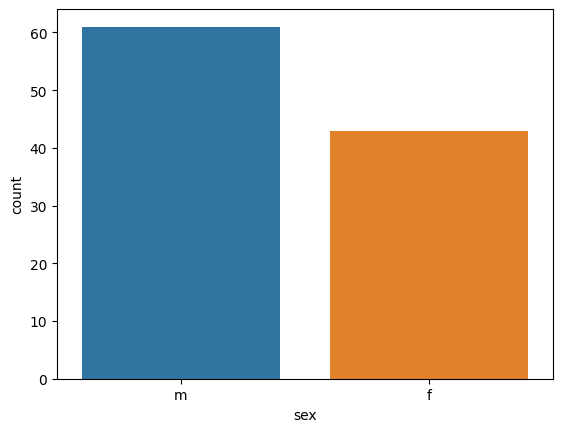

In [11]:
sns.countplot(x='sex', data=data)

In [89]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['sex'] = labelencoder.fit_transform(data['sex'])
data['Pop'] = labelencoder.fit_transform(data['Pop'])

In [13]:
data.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = data.copy()
columns_to_scale = ['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'Pop']
for column in columns_to_scale:
    data_scaled[column] = scaler.fit_transform(data[[column]])

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame() 
vif_data["feature"] = data_scaled.columns 
  
vif_data["VIF"] = [variance_inflation_factor(data_scaled.values, i) 
                          for i in range(len(data_scaled.columns))] 
  
print(vif_data)

     feature        VIF
0       site   7.386410
1        Pop  14.675492
2        sex   1.111179
3        age   1.307995
4    hdlngth   3.851854
5     skullw   2.475575
6   totlngth   4.251974
7      taill   3.188508
8   footlgth   5.732510
9   earconch   5.373570
10       eye   1.439637
11     chest   2.684516
12     belly   1.888056


### Мультиколинеарность показывает сильно коррелирующие значения столбцов. Чем выше значение VIF, тем больше корреляция с другими переменными. 

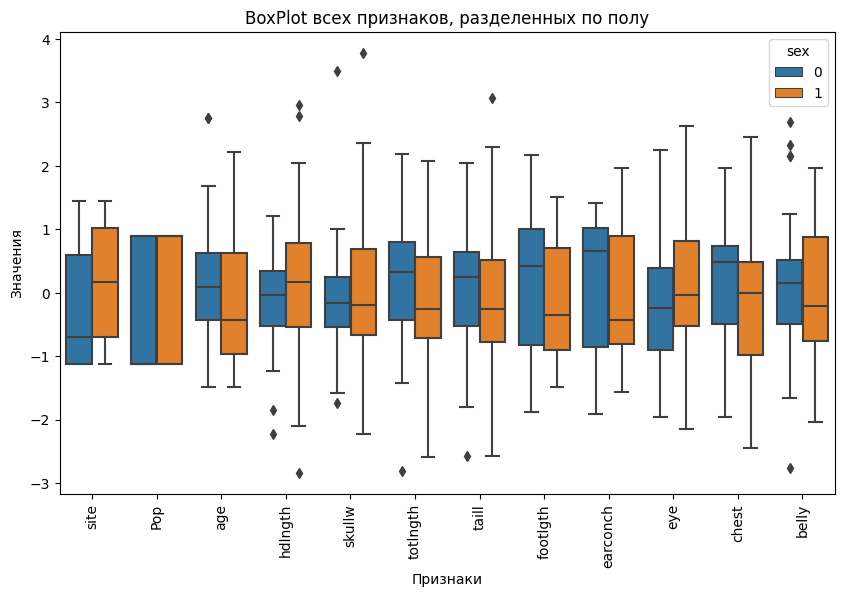

In [15]:
df_melted = data_scaled.melt(id_vars='sex')

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', hue='sex', data=df_melted)
plt.xticks(rotation=90)
plt.title("BoxPlot всех признаков, разделенных по полу")
plt.xlabel("Признаки")
plt.ylabel("Значения")
plt.show()

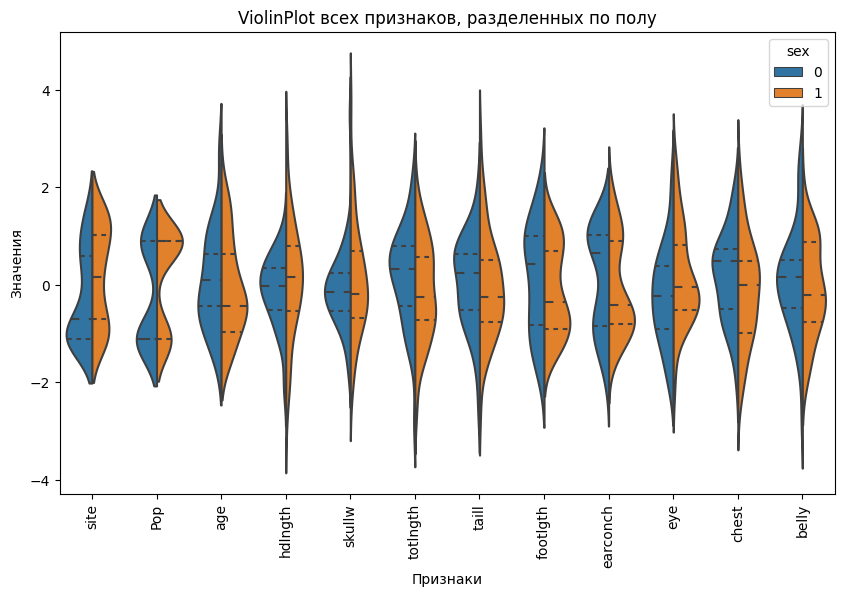

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='variable', y='value', hue='sex', data=df_melted, split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("ViolinPlot всех признаков, разделенных по полу")
plt.xlabel("Признаки")
plt.ylabel("Значения")
plt.show()

### Подобные графики позволяют понять, какие из данных несут в себе схожую информацию. Например, footlgth и earconch имеют достаточно схожие графики в контексте полов. 
### Корреляция между данными: site и earconch, site и footlgth, footlgth и earconch.

# Вариант 1. Предсказание длины головы.

In [92]:
X = data_scaled[['sex','age','skullw','totlngth','eye','chest','belly']]
y = data_scaled['hdlngth']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'r2: {r2_score(y_test, y_pred_lr)}')

MSE: 0.4642740666931074
r2: 0.5669459505920842


In [97]:
y_pred_all = model_lr.predict(X)

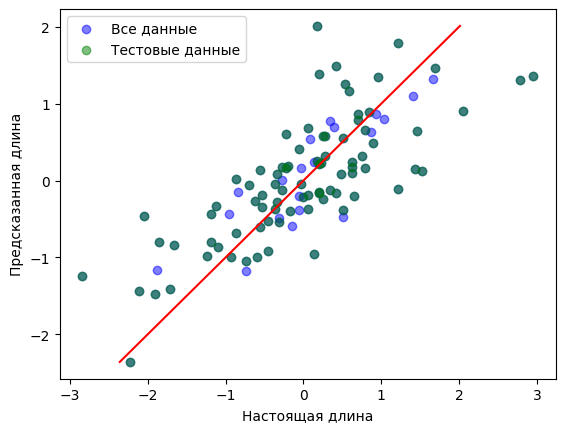

In [98]:
plt.scatter(y, y_pred_all, label="Все данные", color='blue', alpha=0.5)
plt.scatter(y_test, y_pred_lr, label="Тестовые данные", color='green', alpha=0.5)
plt.plot([min(y_pred_lr), max(y_pred_lr)], [min(y_pred_lr), max(y_pred_lr)], color='red')
plt.xlabel("Настоящая длина")
plt.ylabel("Предсказанная длина")

plt.legend()
plt.show()

In [99]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

y_pred_r = ridge.predict(X_test)
y_pred_all = model_lr.predict(X)
print(f'MSE: {mean_squared_error(y_test, y_pred_r)}')
print(f'r2: {r2_score(y_test, y_pred_r)}')

MSE: 0.44571266027066936
r2: 0.5842591989309285


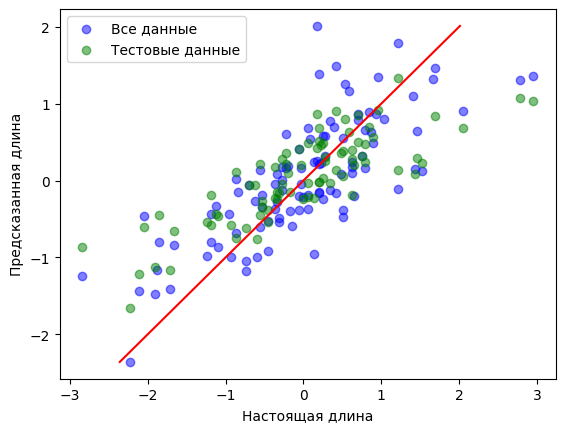

In [100]:
plt.scatter(y, y_pred_all, label="Все данные", color='blue', alpha=0.5)
plt.scatter(y_test, y_pred_r, label="Тестовые данные", color='green', alpha=0.5)
plt.plot([min(y_pred_all), max(y_pred_all)], [min(y_pred_all), max(y_pred_all)], color='red')
plt.xlabel("Настоящая длина")
plt.ylabel("Предсказанная длина")

plt.legend()
plt.show()

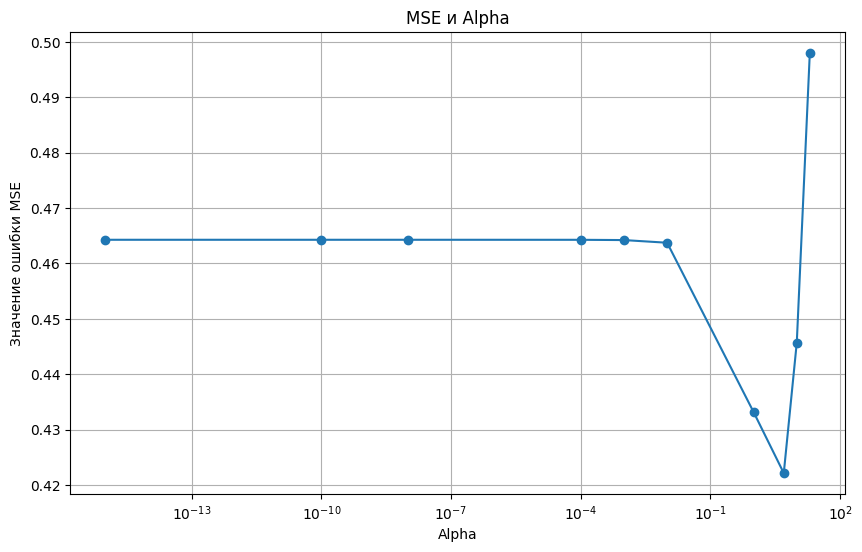

In [24]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
mse_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Значение ошибки MSE')
plt.title('MSE и Alpha')
plt.grid(True)
plt.show()


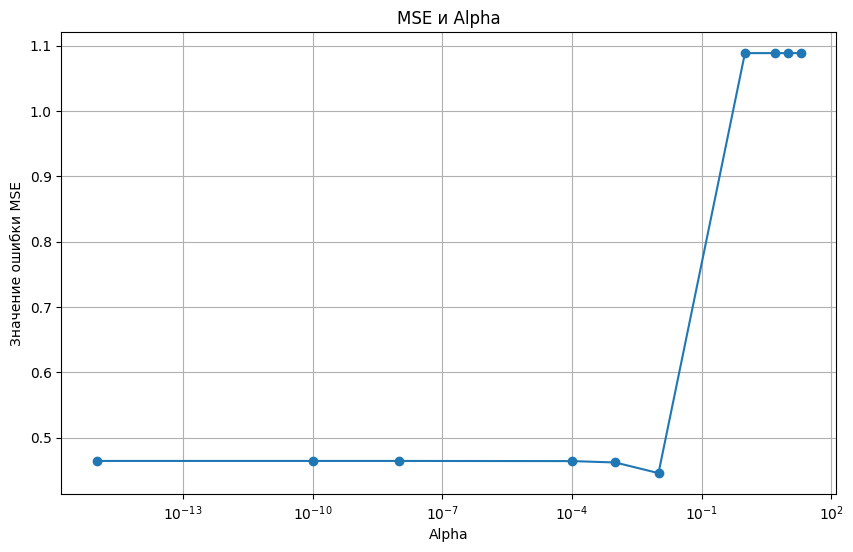

In [25]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
mse_list = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Значение ошибки MSE')
plt.title('MSE и Alpha')
plt.grid(True)
plt.show()

In [101]:
lasso = Lasso(alpha=1e-3)
lasso.fit(X_train, y_train)

y_pred_l = lasso.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_l)}')
print(f'r2: {r2_score(y_test, y_pred_l)}')

MSE: 0.4619239654284132
r2: 0.5691380197645957


In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


tree_model = DecisionTreeRegressor(max_depth=None, random_state=0)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regressor MSE: {mse_tree}")

forest_model = RandomForestRegressor(max_depth=5, n_estimators=200)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regressor MSE: {mse_forest}")

Decision Tree Regressor MSE: 0.5093911564906857
Random Forest Regressor MSE: 0.4044169289803578


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


parameters_tree = {'max_depth': [None, 5, 10, 15, 20]}
parameters_forest = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 15, 20]}

tree_regressor = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters_tree, scoring='neg_mean_squared_error', cv=5)
forest_regressor = GridSearchCV(RandomForestRegressor(random_state=0), parameters_forest, scoring='neg_mean_squared_error', cv=5)

tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

print(f"Decision Tree Regressor Best parameters: {tree_regressor.best_params_}")
print(f"Decision Tree Regressor Best score: {tree_regressor.best_score_}")
print(f"Random Forest Regressor Best parameters: {forest_regressor.best_params_}")
print(f"Random Forest Regressor Best score: {forest_regressor.best_score_}")

Decision Tree Regressor Best parameters: {'max_depth': None}
Decision Tree Regressor Best score: -0.46836761632777774
Random Forest Regressor Best parameters: {'max_depth': 5, 'n_estimators': 200}
Random Forest Regressor Best score: -0.3742943206098953


In [103]:
from sklearn.ensemble import GradientBoostingRegressor

reg1 = GradientBoostingRegressor(random_state=10)
reg1.fit(X_train, y_train)

y_pred_gbr = reg1.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"GradientBoostingRegressor MSE: {mse_gbr}")
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred_gbr)))

GradientBoostingRegressor MSE: 0.39413116784790875
R2 score: 0.63


In [106]:
test_instance = X_test.iloc[2] 

pred_lr = model_lr.predict([test_instance])
pred_ridge = ridge.predict([test_instance])
pred_lasso = lasso.predict([test_instance])
pred_tree = tree_model.predict([test_instance])
pred_forest = forest_model.predict([test_instance])
pred_gbr = reg1.predict([test_instance])

print(y_test.iloc[2])
print(f"Linear Regression Prediction: {pred_lr[0]}")
print(f"RIdge: {pred_ridge[0]}")
print(f"Lasso: {pred_lasso[0]}")
print(f"Decision Tree Regressor Prediction: {pred_tree[0]}")
print(f"Random Forest Regressor Prediction: {pred_forest[0]}")
print(f"GradientBoostingRegressor: {pred_gbr[0]}")

0.25227305584439075
Linear Regression Prediction: 0.5842795298692324
RIdge: 0.49098125934566184
Lasso: 0.5850026647985815
Decision Tree Regressor Prediction: 0.08355024036003925
Random Forest Regressor Prediction: 0.1768493466615321
GradientBoostingRegressor: 0.23840018628500823


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


## Варинт 2. Предсказание возраста

In [107]:
X = data_scaled[['Pop', 'sex', 'hdlngth', 'taill', 'footlgth']]
y = data_scaled['age']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [109]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'r2: {r2_score(y_test, y_pred)}')

MSE: 1.2747509741460563
r2: -0.27146018070845623


In [84]:
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

for i in range(len(rfe.ranking_)):
    print(f"{X.columns[i]}: {rfe.ranking_[i]}")

Pop: 1
sex: 1
hdlngth: 1
taill: 1
footlgth: 1


In [110]:
reg = GradientBoostingRegressor(random_state=10)
reg.fit(X_train, y_train)

y_pred_tree = reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"GradientBoostingRegressor MSE: {mse_tree}")
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred_tree)))

GradientBoostingRegressor MSE: 1.0198581552904713
R2 score: -0.02


In [111]:
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred)
print(f"Decision Tree Regressor MSE: {mse_tree}")
print(f"Decision Tree Regressor MAE: {mae_tree}")

forest_model = RandomForestRegressor(max_depth=5, n_estimators=50)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred)
print(f"Random Forest Regressor MSE: {mse_forest}")
print(f"Random Forest Regressor MAE: {mae_forest}")

Decision Tree Regressor MSE: 1.2272026316937974
Decision Tree Regressor MAE: 0.8750212635617044
Random Forest Regressor MSE: 0.8772553912764574
Random Forest Regressor MAE: 0.8750212635617044


In [114]:
test_instance = X_test.iloc[5] 

pred_lr = model_lr.predict([test_instance])
pred_tree = tree_model.predict([test_instance])
pred_forest = forest_model.predict([test_instance])
pred_gbr = reg.predict([test_instance])

print(y_test.iloc[5])
print(f"Linear Regression Prediction: {pred_lr[0]}")
print(f"Decision Tree Regressor Prediction: {pred_tree[0]}")
print(f"Random Forest Regressor Prediction: {pred_forest[0]}")
print(f"GradientBoostingRegressor: {pred_gbr[0]}")

1.688445905133535
Linear Regression Prediction: -0.40133818683073597
Decision Tree Regressor Prediction: -0.964097510786218
Random Forest Regressor Prediction: -0.04884372070266897
GradientBoostingRegressor: -0.7483804102940267


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# Вариант 3. Определение общей длины опоссума.

In [115]:
data_2 = pd.get_dummies(data, columns=['Pop', 'sex'])

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_2)

MinMaxScaler()

In [117]:
columns_to_scale = ['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'Pop_0', 'Pop_1', 'sex_0', 'sex_1']
for column in columns_to_scale:
    data_scaled[column] = scaler.fit_transform(data_2[[column]])

In [39]:
data_2.columns

Index(['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly', 'Pop_0', 'Pop_1', 'sex_0',
       'sex_1'],
      dtype='object')

In [118]:
X = data_scaled[['Pop_0', 'sex_1', 'hdlngth', 'taill', 'footlgth']]
y = data_scaled['totlngth']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [120]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred)
print(f"Decision Tree Regressor MSE: {mse_tree}")

forest_model = RandomForestRegressor(max_depth=5, n_estimators=50)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred)
print(f"Random Forest Regressor MSE: {mse_forest}")

Decision Tree Regressor MSE: 0.03581618549709409
Random Forest Regressor MSE: 0.016568103561525563


In [121]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'r2: {r2_score(y_test, y_pred)}')

MSE: 0.014199550041173351
r2: 0.6143729081630771


In [122]:
reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, y_train)

y_pred_tree = reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"GradientBoostingRegressor MSE: {mse_tree}")
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred_tree)))

GradientBoostingRegressor MSE: 0.023399100059673168
R2 score: 0.36


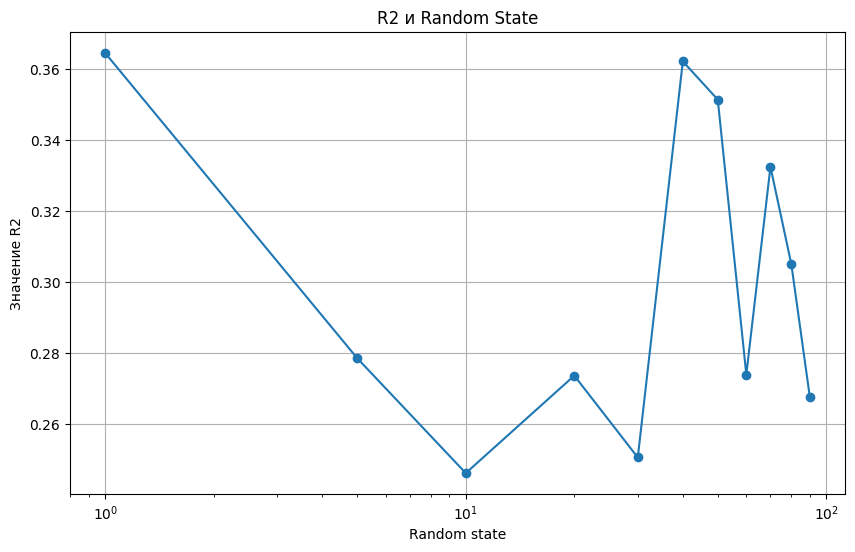

In [45]:
random_states = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
r2_list = []

for random_state in random_states:
    reg = GradientBoostingRegressor(random_state=random_state)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(random_states, r2_list, marker='o')
plt.xscale('log')
plt.xlabel('Random state')
plt.ylabel('Значение R2')
plt.title('R2 и Random State')
plt.grid(True)
plt.show()

In [123]:
test_instance = X_test.iloc[5] 

pred_lr = model_lr.predict([test_instance])
pred_tree = tree_model.predict([test_instance])
pred_forest = forest_model.predict([test_instance])
pred_gbr = reg.predict([test_instance])

print(y_test.iloc[5])
print(f"Linear Regression Prediction: {pred_lr[0]}")
print(f"Decision Tree Regressor Prediction: {pred_tree[0]}")
print(f"Random Forest Regressor Prediction: {pred_forest[0]}")
print(f"GradientBoostingRegressor: {pred_gbr[0]}")

0.41860465116279055
Linear Regression Prediction: 0.36392970287249177
Decision Tree Regressor Prediction: 0.2558139534883721
Random Forest Regressor Prediction: 0.3411550387596901
GradientBoostingRegressor: 0.2675499550705128


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# Вариант 3. Определение длины головы по ширине черепа.

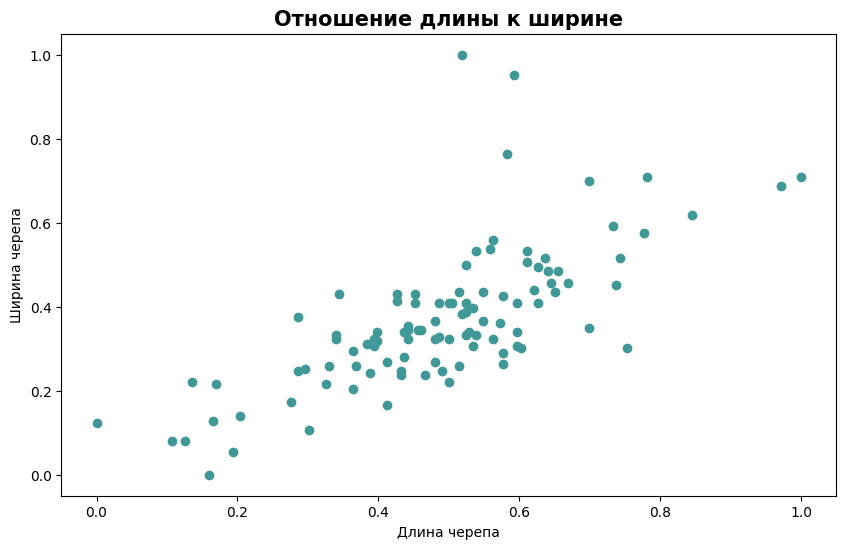

In [124]:
head_length_values = data_scaled.hdlngth.values
skull_width_values = data_scaled.skullw.values 
plt.figure(figsize=(10, 6))
plt.scatter(head_length_values, skull_width_values, color='#409996')
plt.xlabel("Длина черепа")
plt.ylabel("Ширина черепа")
plt.title("Отношение длины к ширине", size=15, fontweight='bold', ha='center')
plt.show()

In [125]:
head_length_vector = head_length_values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(head_length_vector, skull_width_values, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Тренировочные данные')

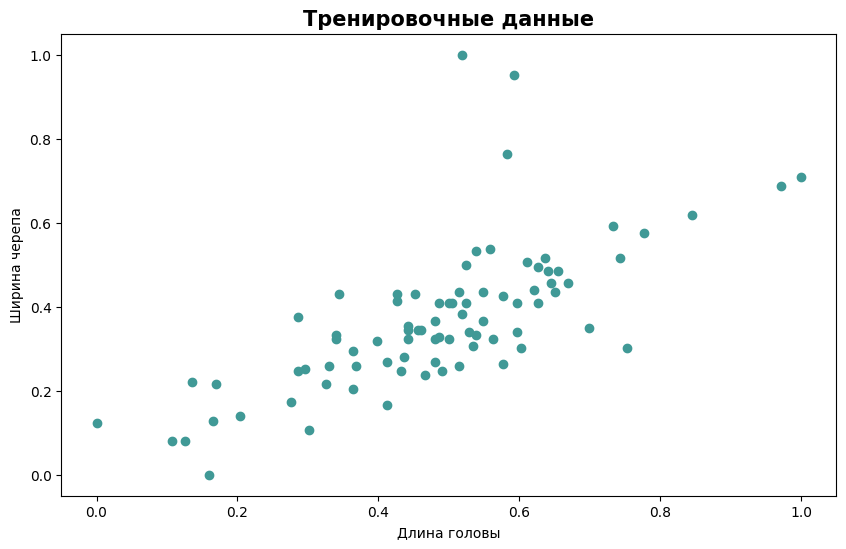

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train, color='#409996')
plt.xlabel("Длина головы")
plt.ylabel("Ширина черепа")
plt.title("Тренировочные данные", size=15, fontweight='bold', ha='center')

Text(0.5, 1.0, 'Тестовые данные')

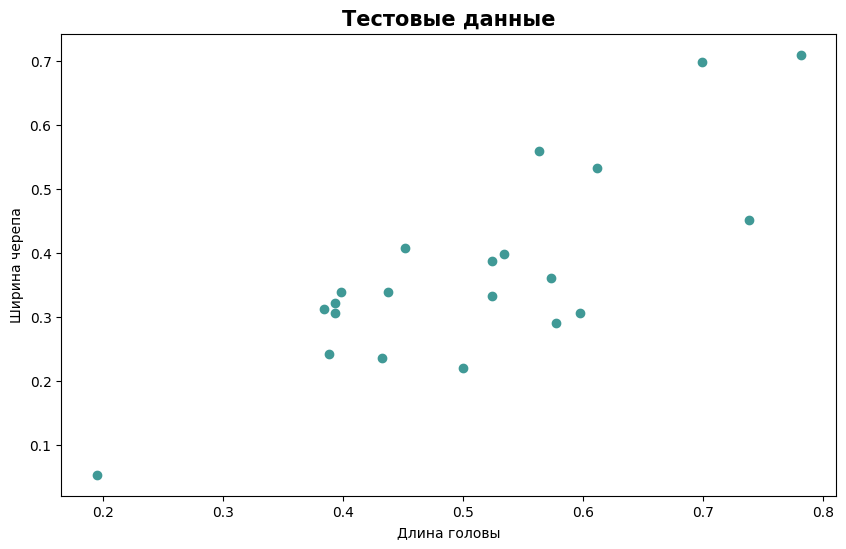

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='#409996')
plt.xlabel("Длина головы")
plt.ylabel("Ширина черепа")
plt.title("Тестовые данные", size=15, fontweight='bold', ha='center')

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R2: {r2_score(y_test, y_pred_lr)}")

MSE: 0.009280840018148136
R2: 0.5895760750750055


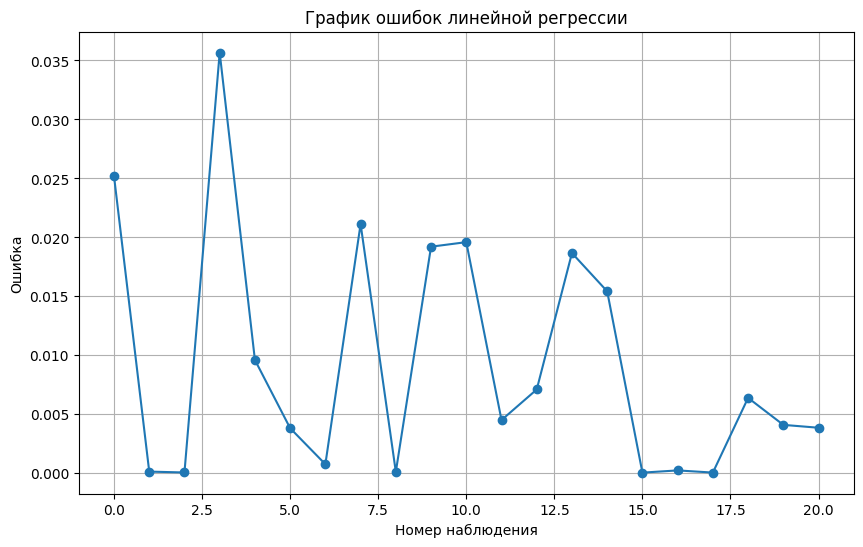

In [51]:
errors = [mean_squared_error([y_test[i]], [y_pred_lr[i]]) for i in range(len(y_test))]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), errors, 'o-')
plt.title('График ошибок линейной регрессии')
plt.xlabel('Номер наблюдения')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

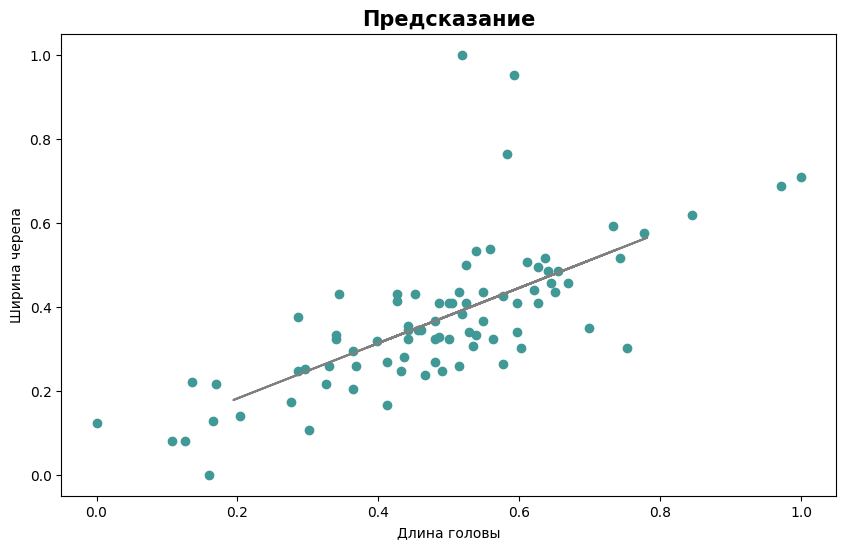

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train, color='#409996')
plt.plot(x_test, y_pred_lr, color='grey')
plt.xlabel("Длина головы")
plt.ylabel("Ширина черепа")
plt.title("Предсказание", fontsize = 15, fontweight='bold', ha='center')
plt.show()

In [53]:
index = 20
x_instance = x_test[index].reshape(1, -1)
y_pred_instance = lr.predict(x_instance)

print(f"Предсказанное значение: {y_pred_instance[0]}")
print(f"Реальное значение: {y_test[index]}")

Предсказанное значение: 0.3950756478818907
Реальное значение: 0.3333333333333335


# Вариант 4. Предсказание размера уха по длине стопы.

In [126]:
X = data_scaled[['footlgth']]
y = data_scaled['earconch']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [59]:
from sklearn.svm import SVR 

In [128]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred_svr)}")
print(f"R2: {r2_score(y_test, y_pred_svr)}")

MSE: 0.032156623335741194
R2: 0.5382353087044591


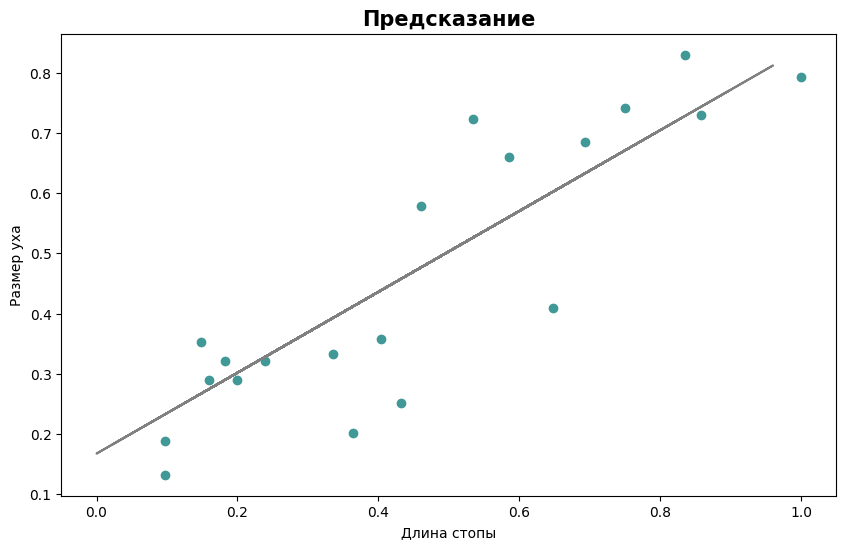

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='#409996')
plt.plot(X_test, y_pred_svr, color='grey')
plt.xlabel("Длина стопы")
plt.ylabel("Размер уха")
plt.title("Предсказание", fontsize = 15, fontweight='bold', ha='center')
plt.show()

In [129]:
test_instance = X_test.iloc[5] 

pred_svr = svr.predict([test_instance])

print(y_test.iloc[5])
print(f"SVR Prediction: {pred_svr[0]}")

0.3018867924528301
SVR Prediction: 0.3160596693227644


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# Итог
## <bold>Вариант 1. Предсказание длины головы. С применением StandardScaler</bold>
### <bold>Linear Regression</bold>
<li>MSE: 0.4642740666931074</li>
<li>R2: 0.5669459505920842</li>

### <bold>Ridge</bold>
<li>MSE: 0.44571266027066936</li>
<li>R2: 0.5842591989309285</li>

### <bold>Lasso</bold>
<li>MSE: 0.4619239654284132</li>
<li>R2: 0.5691380197645957</li>

### <bold>DecisionTreeRegressor</bold>
<li>MSE: 0.5093911564906857</li>

### <bold>Random Forest Regressor</bold> 
<li>MSE: 0.4044169289803578</li>

### <bold>GradientBoostingRegressor</bold> 
<li>MSE: 0.39413116784790875</li>
<li>R2 score: 0.63</li>

### Предсказания моделей
0.25227305584439075
<li>Linear Regression: 0.5842795298692324</li>
<li>RIdge: 0.49098125934566184</li>
<li>Lasso: 0.5850026647985815</li>
<li>Decision Tree Regressor: 0.08355024036003925</li>
<li>Random Forest Regressor: 0.1768493466615321</li>
<li>GradientBoostingRegressor: 0.23840018628500823</li>

### В данной задаче лучшие результаты показала модель GradientBoostingRegressor (меньшее значение ошибки в сравнении с остальными моделями и наибольшее значение R2-score). Предсказание также наиболее приближенное к реальному.

## <bold>Варинт 2. Предсказание возрастаю С применением StandardScaler</bold>
### <bold>Linear Regression</bold>
<li>MSE: 1.2747509741460563</li>
<li>r2: -0.27146018070845623</li>

### <bold>DecisionTreeRegressor</bold>
<li>MSE: 1.2272026316937974</li>
<li>MAE: 0.8750212635617044</li>

### <bold>Random Forest Regressor</bold> 
<li>MSE: 0.8772553912764574</li>
<li>MAE: 0.8750212635617044</li>

### <bold>GradientBoostingRegressor</bold> 
<li>MSE: 1.0198581552904713</li>
<li>R2 score: -0.02</li>

### Предсказания моделей
1.688445905133535
<li>Linear Regression: -0.40133818683073597</li>
<li>Decision Tree Regressor: -0.964097510786218</li>
<li>Random Forest Regressor: -0.04884372070266897</li>
<li>GradientBoostingRegressor: -0.7483804102940267</li>

### Для данной задачи модели показали себя намного хуже (большие значения ошибки, маленькое значение r2). Наиболее приближенным среди всех моделей к реальным данным оказался метод Random Forest Regressor

# <bold>Вариант 3. Определение общей длины опоссума. С использованием MinMaxScaler и разделением столбцов Pop и sex на несколько.</bold>

### <bold>Linear Regression</bold>
<li>MSE: 0.014199550041173351</li>
<li>r2: 0.6143729081630771</li>

### <bold>DecisionTreeRegressor</bold>
<li>MSE: 0.03581618549709409</li>

### <bold>Random Forest Regressor</bold> 
<li>MSE: 0.016568103561525563</li>

### <bold>GradientBoostingRegressor</bold> 
<li>MSE: 0.023399100059673168</li>
<li>R2: 0.36</li>

### Предсказания моделей
0.41860465116279055
<li>Linear Regression: 0.36392970287249177</li>
<li>Decision Tree Regressor: 0.2558139534883721</li>
<li>Random Forest Regressor: 0.3411550387596901</li>
<li>GradientBoostingRegressor: 0.2675499550705128</li>

### С применением MinMaxScaler ошибка стала гораздо меньше. Самая маленькая ошибка для данной задачи оказалась у метода Linear Regression. Также и с предсказанием, лучшей оказалась линейная регрессия.

# <bold>Вариант 4. Предсказание размера уха по длине стопы.</bold>

### <bold>SVR</bold>
<li>MSE: 0.032156623335741194</li>
<li>r2: 0.5382353087044591</li>

### Предсказания модели
0.3018867924528301
<li>SVR: 0.3160596693227644</li>

### В контексте данной задачи использовался только один метод SVR с линейным ядром. Модель неплохо себя показала засчет небольшой ошибки и близкого предсказания.